<a href="https://colab.research.google.com/github/Pradeep8896/Hotel-Booking-Analysis-EDA-/blob/main/Hotel_Booking_EDA_Cohort_Hardeol_Pro_Pradeep_Kumar_Verma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!</b>

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing all important python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To display all present columns in dataframe
pd.set_option('display.max_columns',None)

In [ ]:
# Reading the DataFrame
df =pd.read_csv('/content/drive/MyDrive/Data_for_pract/Hotel_booking/hotel_bookings.csv')

In [ ]:
# Looking top 5 rows of dataframe
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# To see last 5 rows
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# To check shape of dataframe
df.shape

(119390, 32)

In [ ]:
# To check Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Data Preprocessing** Data Preprocessing is an important step to perform in EDA

In [ ]:
# To see all column names
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**Step 1: Drop duplicates if any**

In [ ]:
# To Check Duplicate Rows
df.duplicated().sum()

31994

In [ ]:
#Now we are going to drop all the duplicated Rows
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(87396, 32)

**Step 2: Handling Missing Values**

In [ ]:
# To check null values in DataFrame
df.isnull().sum().sort_values(ascending=False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns. We will remove those rows, if required otherwise impute by most frequent or by mean values.

In [ ]:
df.isnull().mean().sort_values(ascending=False)[:6]*100

company               93.982562
agent                 13.951439
country                0.517186
children               0.004577
reserved_room_type     0.000000
assigned_room_type     0.000000
dtype: float64

Since, in Company column 93.98% data is missing, so we will remove that column, and in other columns we will impute values.

In [ ]:
df.drop(['company'],axis=1,inplace=True)

Agent Column

Skewness of agent column is 0.8904040570601741


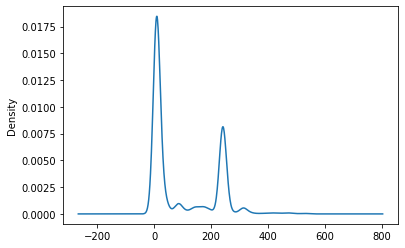

In [ ]:
df['agent'].plot(kind='kde')
skew=df['agent'].skew()
print(f'Skewness of agent column is {skew}')

In [ ]:
# Mean value of agent column
mean=round(df['agent'].mean(),3)
# Median Value of agent column
median=df['agent'].median()
print(f'Mean is {mean} , median is {median}')

Mean is 94.138 , median is 14.0


In [ ]:
# Impute mean values
df['agent_mean']=df['agent'].fillna(mean)
# Impute median values
df['agent_median']=df['agent'].fillna(median)

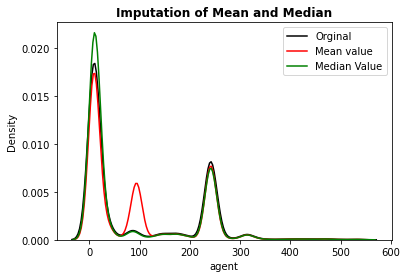

In [ ]:
plt.title('Imputation of Mean and Median',fontweight='bold')
sns.kdeplot(df['agent'],label='Orginal',color='k')
sns.kdeplot(df['agent_mean'],label='Mean value',color='r')
sns.kdeplot(df['agent_median'],label='Median Value',color='g')
plt.legend()
plt.show()

From this kde graph we can evaluate median value is good for null values in agent column.

In [ ]:
# Dropping unwanted columns
df.drop(['agent','agent_mean'],axis=1,inplace=True)

In [ ]:
# Imputing Most Frequent values in Country
country_mode=df['country'].mode()[0]
df['country']=df['country'].fillna(country_mode)

In [ ]:
# Imputing mean values in children columns
child_mean=round(df['children'].mean(),2)
df['children']=df['children'].fillna(child_mean)
child_mean

0.14

After Handling Missing Values You can see all values are imputed as per requirements.

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

**Step 3: Exploratory Data Analysis**

Univariate Analysis

Q1. What is the number and percentage of booking in each hotel?

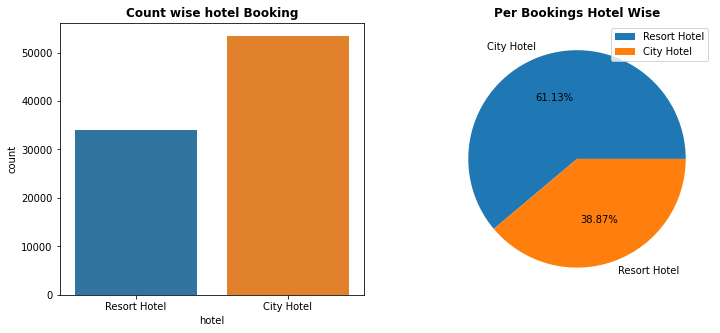

In [ ]:
plt.figure(figsize=(12,5))
legend=df['hotel'].unique().tolist()
plt.subplot(121)
plt.title('Count wise hotel Booking',fontweight='bold')
sns.countplot(x=df['hotel'])
plt.subplot(122)
plt.title('Per Bookings Hotel Wise',fontweight='bold')
df['hotel'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.legend(legend)
plt.show()

Approx 60% bookings are for City hotel and 40% bookings are for Resort hotel.

In [ ]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,agent_median
16309,Resort Hotel,0,11,2015,August,34,19,0,4,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,196.75,0,1,Check-Out,2015-08-23,240.0
30564,Resort Hotel,0,17,2016,November,48,26,0,1,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,48.00,0,1,Check-Out,2016-11-27,242.0
94608,City Hotel,0,140,2016,July,32,31,2,5,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,0,Transient-Party,114.63,0,0,Check-Out,2016-08-07,9.0
34303,Resort Hotel,0,2,2017,March,11,18,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,95.00,0,1,Check-Out,2017-03-19,240.0
15267,Resort Hotel,0,2,2017,August,31,3,0,2,2,0.0,0,BB,PRT,Corporate,Corporate,1,1,7,D,D,0,No Deposit,0,Transient,0.00,1,2,Check-Out,2017-08-05,14.0


Arrival date Year

Q2. What is the frequency of tourist in an year?

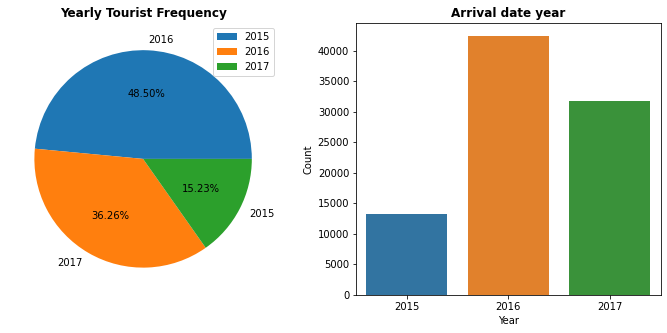

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Yearly Tourist Frequency',fontweight='bold')
legend=df['arrival_date_year'].unique().tolist()
df['arrival_date_year'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.legend(legend)
plt.ylabel('')
plt.subplot(122)
plt.title('Arrival date year',fontweight='bold')
sns.countplot(x=df['arrival_date_year'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Approx 15% bookings are in 2015, 49% bookings are in 2016 and around 36% bookings are in 2017.

Arrival date Month

Q3. What is the most favourable month to visit?

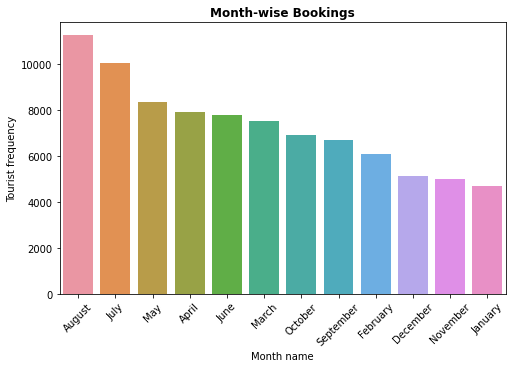

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Month-wise Bookings',fontweight='bold')
sns.countplot(x=df['arrival_date_month'],order=df['arrival_date_month'].value_counts().index)
plt.xticks(rotation="45")
plt.xlabel('Month name')
plt.ylabel('Tourist frequency')
plt.show()

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,agent_median
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,14.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,14.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,14.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,304.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,240.0


Meal

Q4. which meal has more demand than others?

In [ ]:
df['meal'].value_counts()

BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64

In [ ]:
df['meal']=df['meal'].apply(lambda x:'others' if x=='Undefined' else x)

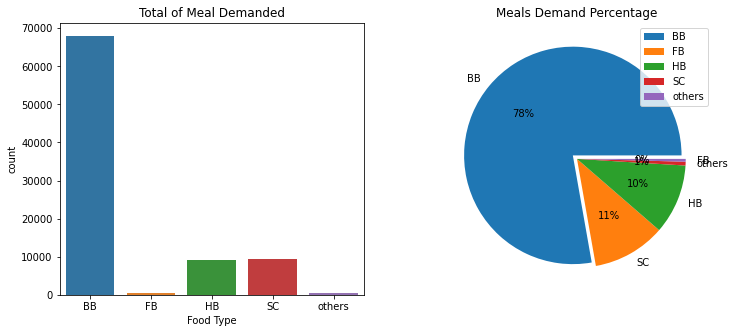

In [ ]:
plt.figure(figsize=(12,5))
legend=df['meal'].unique().tolist()
plt.subplot(121)
plt.title('Total of Meal Demanded')
sns.countplot(x=df['meal'])
plt.xlabel('Food Type')
plt.subplot(122)
explode=[0.05,0,0,0,0]
plt.title('Meals Demand Percentage')
df['meal'].value_counts().plot(kind='pie', explode=explode,autopct='%1.0f%%')
plt.legend(legend)
plt.ylabel('')
plt.show()

Country

Q5. From where the most guests are coming ?

In [ ]:
x=df['country'].value_counts()>1000
country_name=x[x].keys().tolist()
df['upd_country']=df['country'].apply(lambda x:x if x in country_name else 'others')

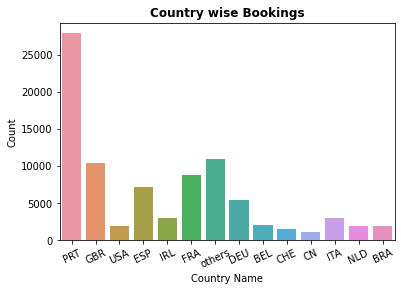

In [ ]:
plt.title('Country wise Bookings',fontweight='bold')
sns.countplot(x=df['upd_country'])
plt.xlabel('Country Name')
plt.xticks(rotation='25')
plt.ylabel('Count')
plt.show()

Market Segment

Q6. Which market segment has most bookings?

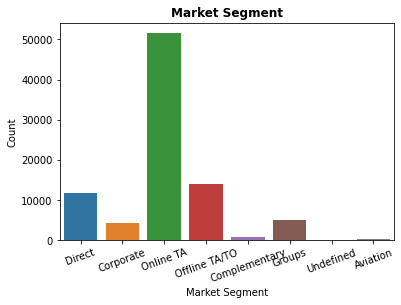

In [ ]:
plt.title('Market Segment',fontweight='bold')
sns.countplot(x=df['market_segment'])
plt.xlabel('Market Segment')
plt.xticks(rotation='20')
plt.ylabel('Count')
plt.show()

Distribution Channel

Q7. Which booking channel is most used for bookings?

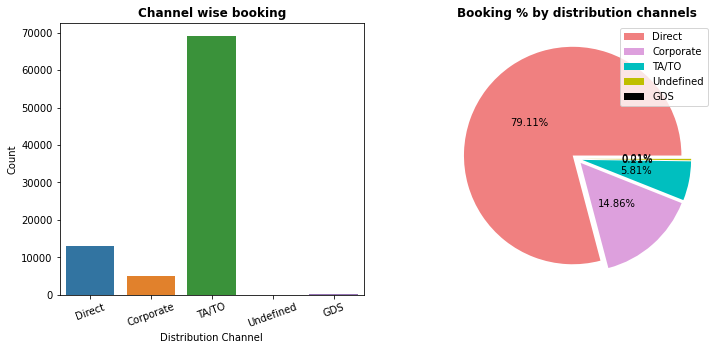

In [ ]:
plt.figure(figsize=(12,5))
labels=['Direct','Corporate','TA/TO','Undefined','GDS']
plt.subplot(121)
plt.title('Channel wise booking',fontweight='bold')
sns.countplot(x=df['distribution_channel'])
plt.xlabel('Distribution Channel')
plt.xticks(rotation='20')
plt.ylabel('Count')
plt.subplot(122)
plt.title("Booking % by distribution channels",fontweight='bold')
plt.pie(df['distribution_channel'].value_counts(),autopct='%1.2f%%',explode=[0.05]*5,
        pctdistance=0.5,colors=['lightcoral','plum','c','y','k'])
plt.legend(labels)
plt.show()

Reserved Room Type

Customer Type

Q9. Which customer type has most frequent values?

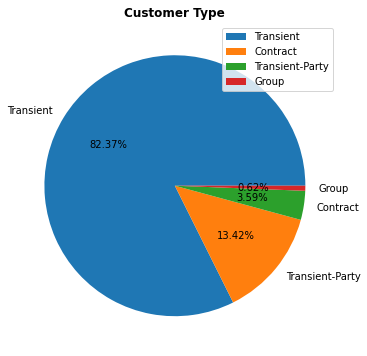

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Customer Type',fontweight='bold')
legend=df['customer_type'].unique().tolist()
df['customer_type'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.legend(legend)
plt.ylabel('')
plt.show()

Bi-Variate Analysis

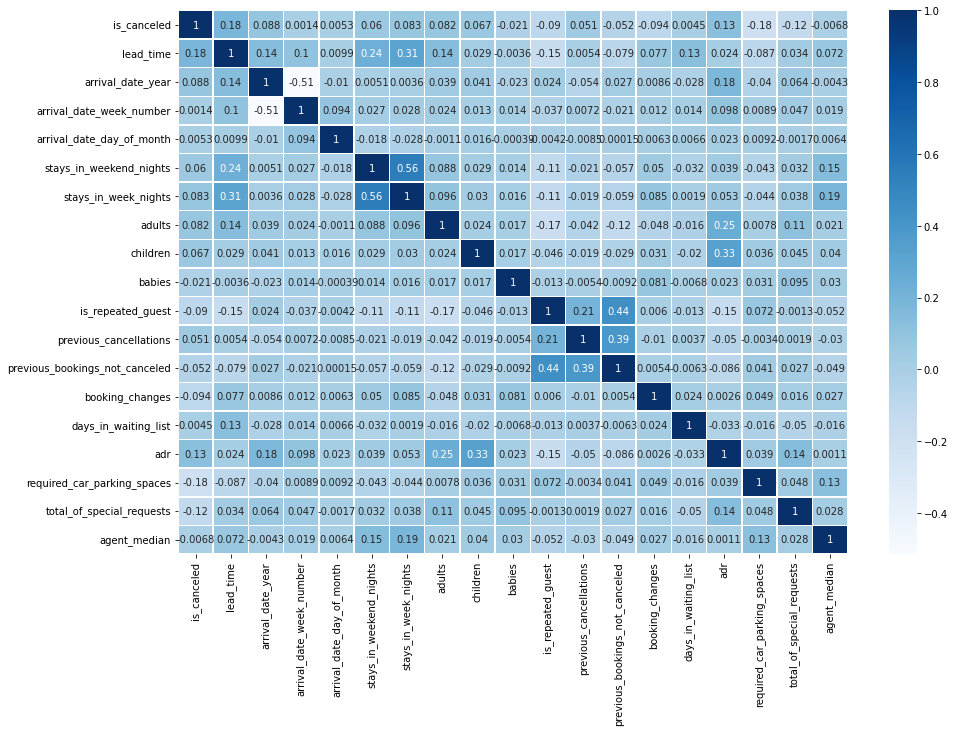

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5, cmap='Blues',color='k')
plt.show()

hotel & Cancellation

Q1. Which hotel having most cancellation?

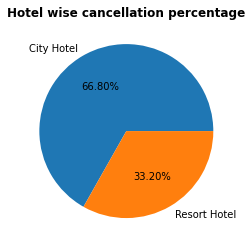

In [ ]:
plt.title('Hotel wise cancellation percentage',fontweight='bold')
df.groupby('hotel').sum()['is_canceled'].plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.show()

as you can see in pie graph city hotel having approx 67% and 33% cancellation by Resort Hotel.

Q2) Which significant distribution channel has highest cancellation percentage?

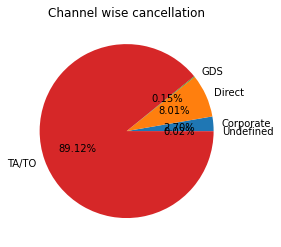

In [ ]:
plt.title('Channel wise cancellation')
df.groupby('distribution_channel').sum()['is_canceled'].plot(kind='pie', autopct='%1.2f%%')
plt.ylabel('')
plt.show()

Q3. What is the effect of waiting time and lead time on cancelation?

In [ ]:
waiting_time=df[df['days_in_waiting_list']!=0]

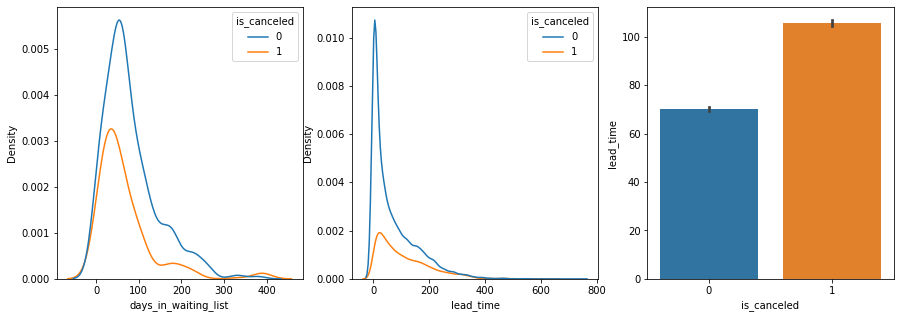

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(ax=axes[0],x='days_in_waiting_list',hue='is_canceled', data=waiting_time)
sns.kdeplot(ax=axes[1],x='lead_time',hue='is_canceled', data=df)
sns.barplot(ax=axes[2],x='is_canceled',y='lead_time',data=df)
plt.show()

We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings. Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.

Q4. What is the effect of the family on cancellation?

In [ ]:
df['family']=df['adults']+df['babies']+df['children']

In [ ]:
df1=df.drop(['adults','babies','children'],axis=1)

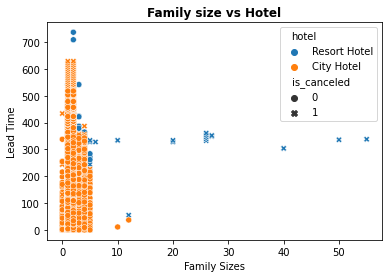

In [ ]:
plt.title('Family size vs Hotel',fontweight='bold')
sns.scatterplot(x='family', y='lead_time', data=df1, hue='hotel', style='is_canceled')
plt.xlabel('Family Sizes')
plt.ylabel('Lead Time')
plt.show()

(0.0, 10.0)

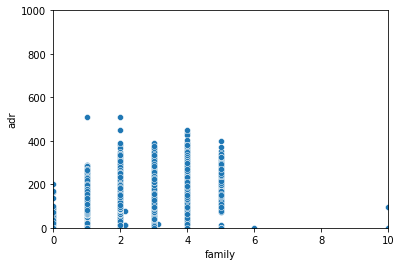

In [ ]:
sns.scatterplot(x='family',y='adr',data=df1)
plt.ylim(0,1000)
plt.xlim(0,10)

Q5. Which Hotel is most prefered for night stay?

In [ ]:
night_stay=df1.groupby('hotel').sum()[['stays_in_weekend_nights','stays_in_week_nights']].reset_index()

In [ ]:
night_stay

,hotel,stays_in_weekend_nights,stays_in_week_nights
0,City Hotel,46598,121519
1,Resort Hotel,41258,107930


In [ ]:
df2=df1.drop(['country'],axis=1)

Q6. What is the effect of meal on Hotel Cancellation?

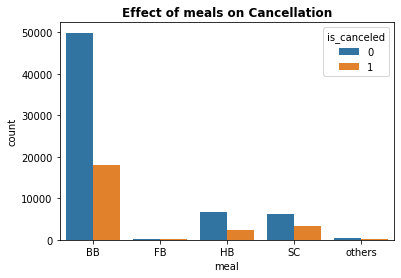

In [ ]:
plt.title('Effect of meals on Cancellation',fontweight='bold')
sns.countplot(x=df1['meal'],hue=df1['is_canceled'])
plt.show()

from above graph we can see, there are no such effect of meal on Hotel_cancellation

Q7. What is the percentage of repeated guest in each hotel?

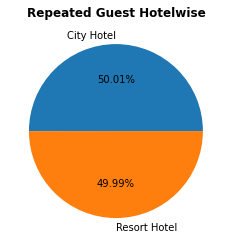

In [ ]:
plt.title('Repeated Guest Hotelwise', fontweight='bold')
df2.groupby('hotel').sum()['is_repeated_guest'].plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.show()

Q8. What is the effect of parking space on Hotel cancellation?

In [ ]:
parking=df2.groupby('hotel').sum()['required_car_parking_spaces'].reset_index()

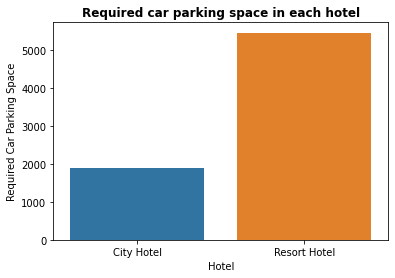

In [ ]:
plt.title('Required car parking space in each hotel',fontweight='bold')
sns.barplot(x='hotel',y='required_car_parking_spaces',data=parking)
plt.ylabel('Required Car Parking Space')
plt.xlabel('Hotel')
plt.show()

Q9. Which room type is in most demand and which room type generates highest adr?

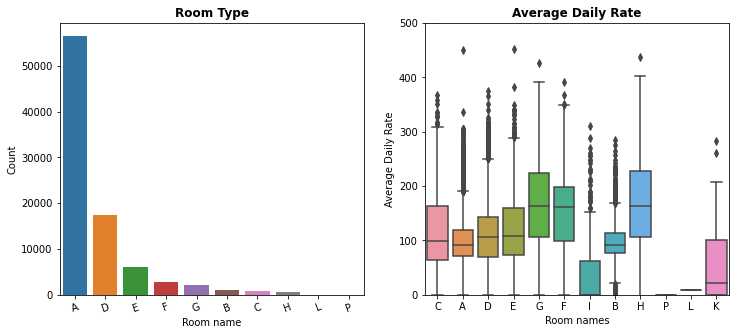

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Room Type',fontweight='bold')
sns.countplot(x=df['reserved_room_type'],order=df['reserved_room_type'].value_counts().index)
plt.xlabel('Room name')
plt.xticks(rotation='20')
plt.ylabel('Count')
plt.subplot(122)
plt.title('Average Daily Rate',fontweight='bold')
sns.boxplot(x='assigned_room_type',y='adr',data=df2)
plt.xlabel('Room names')
plt.ylabel('Average Daily Rate')
plt.ylim(0,500)
plt.show()

Most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue.

Q10. Which hotel having maximum number of special request?

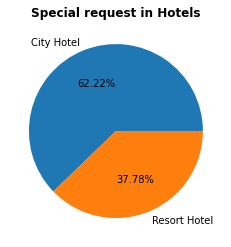

In [ ]:
plt.title('Special request in Hotels',fontweight='bold')
df2.groupby('hotel').sum()['total_of_special_requests'].plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.show()

Q11. Which hotel having maximum request under various family conditions?

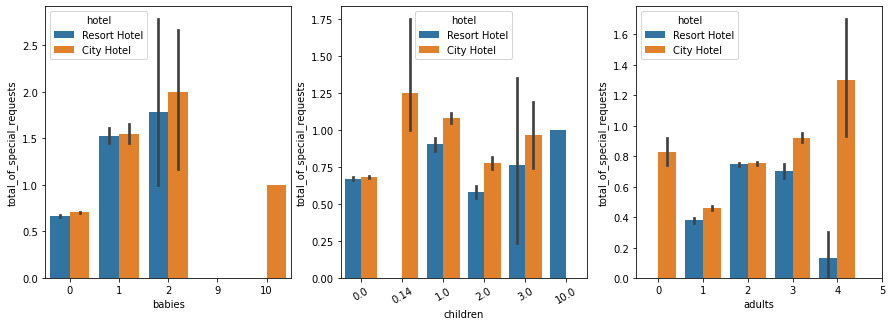

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.barplot(x='babies',y='total_of_special_requests',data=df, hue='hotel')
plt.subplot(132)
sns.barplot(x='children',y='total_of_special_requests',data=df, hue='hotel')
plt.xticks(rotation=30)
plt.subplot(133)
sns.barplot(x='adults',y='total_of_special_requests',data=df, hue='hotel')
plt.xlim(-0.5,5)
plt.show()

Q12. Which month having Maximum cancellation?

In [ ]:
month_cancel=df2.groupby('arrival_date_month').sum()['is_canceled'].reset_index().sort_values('is_canceled',ascending=False)

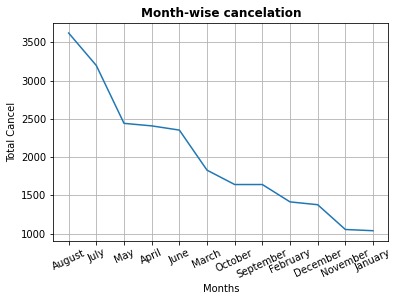

In [ ]:
plt.title('Month-wise cancelation',fontweight='bold')
sns.lineplot(x='arrival_date_month',y='is_canceled',data=month_cancel)
plt.grid()
plt.xlabel('Months')
plt.ylabel('Total Cancel')
plt.xticks(rotation='25')
plt.show()

From above graph it is clear that maximum no of cancellation occurs in August followed by july and others.

Q13. Which deposite type have maximum cancellation?

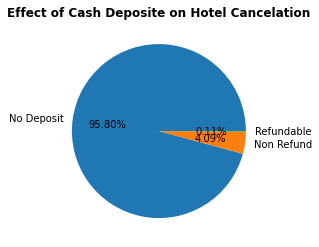

In [ ]:
plt.title('Effect of Cash Deposite on Hotel Cancelation',fontweight='bold')
df2.groupby('deposit_type').sum()['is_canceled'].plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.show()

Q14. What is the percentage of cancellation due to not getting reserved rooms?

In [ ]:
def compare(dataframe):
  if (dataframe['reserved_room_type']==dataframe['assigned_room_type']):
    return 0
  else:
    return 1

df2['room_assign_type']=df2.apply(lambda x: compare(x),axis=1)
choice_room=df2.groupby('hotel').sum()['room_assign_type'].reset_index()
total_room=df2['hotel'].value_counts().reset_index()
total_room=total_room.rename(columns={'index':'hotel','hotel':'total'})
final_room_choice=choice_room.merge(total_room,on='hotel')
final_room_choice['per']=final_room_choice['room_assign_type']/final_room_choice['total']*100
final_room_choice

,hotel,room_assign_type,total,per
0,City Hotel,6092,53428,11.402261
1,Resort Hotel,7017,33968,20.657678


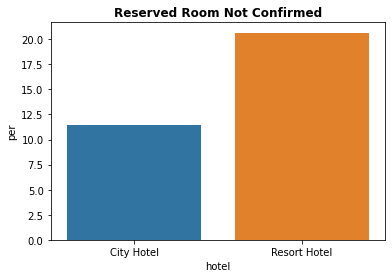

In [ ]:
plt.title('Reserved Room Not Confirmed',fontweight='bold')
sns.barplot(x='hotel',y='per',data=final_room_choice)
plt.show()

from above graph it is clear that around 10 and 20 per cancellation happened due to not getting reserved room in city hotel and Resort hotel respectively.

**Thanks & Regards**

**Pradeep Kumar Verma**